**Importing necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
%matplotlib inline

**Loading the datasets using tensorflow datasets**

In [3]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

**Creation of hub layer which takes the first layer of our network**

In [4]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

**Creation of the neural network model**

In [5]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


**Model compilation**

In [7]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

**Evaluation of test model**

In [8]:
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 3s - loss: 1.2295 - accuracy: 0.4988


In [9]:
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 1.229
accuracy: 0.499


**Training of the dataset with 50 iterations**

In [11]:

history = model.fit(train_data.batch(512), epochs=50, verbose=1)

Epoch 1/50
30/30 [==============================] - 2s 68ms/step - loss: 0.2945 - accuracy: 0.8753
Epoch 2/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2754 - accuracy: 0.8851
Epoch 3/50
30/30 [==============================] - 2s 65ms/step - loss: 0.2587 - accuracy: 0.8936
Epoch 4/50
30/30 [==============================] - 2s 66ms/step - loss: 0.2435 - accuracy: 0.9007
Epoch 5/50
30/30 [==============================] - 2s 65ms/step - loss: 0.2293 - accuracy: 0.9081
Epoch 6/50
30/30 [==============================] - 2s 65ms/step - loss: 0.2163 - accuracy: 0.9149
Epoch 7/50
30/30 [==============================] - 2s 65ms/step - loss: 0.2041 - accuracy: 0.9208
Epoch 8/50
30/30 [==============================] - 2s 67ms/step - loss: 0.1927 - accuracy: 0.9257
Epoch 9/50
30/30 [==============================] - 2s 68ms/step - loss: 0.1820 - accuracy: 0.9316
Epoch 10/50
30/30 [==============================] - 2s 65ms/step - loss: 0.1719 - accuracy: 0.9363
Epoch 11/

**Accuracy curve wrt epochs**

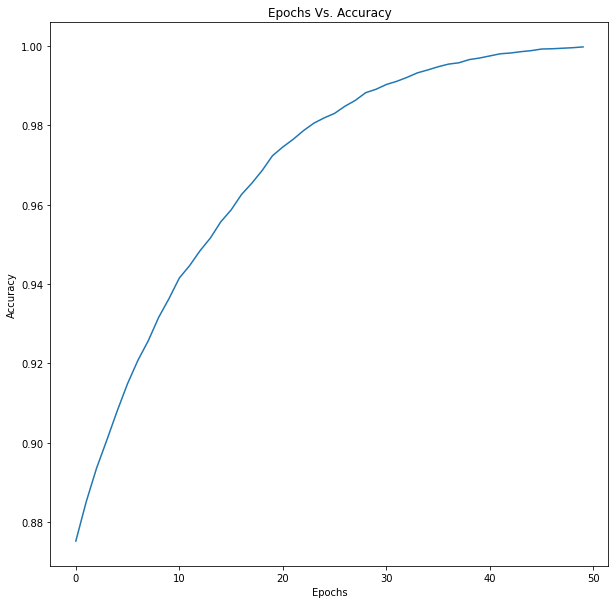

In [12]:

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs. Accuracy');

**Loss curve wrt epochs**

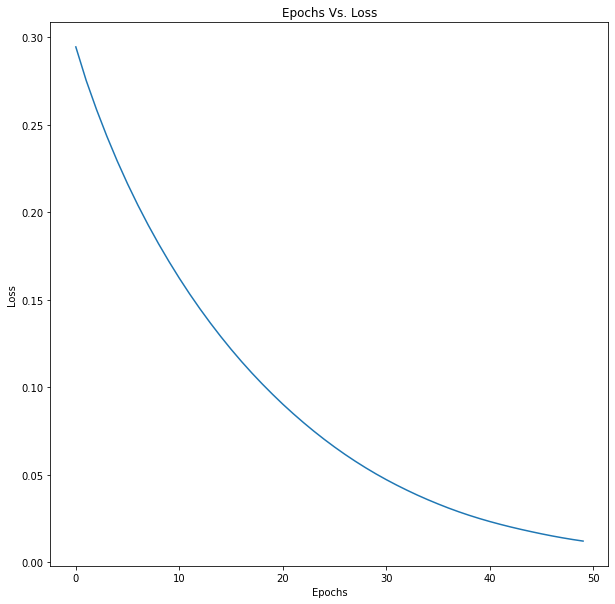

In [14]:

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Loss');